# Hackathon Dotz

##### Classificar as observações por (CATEGORIA | SUB-CATEGORIA)

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sct
import statsmodels.api as sm
from google.colab import files  
import re
#import logging
#from optparse import OptionParser
#import sys
from time import time
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.model_selection import train_test_split



In [4]:
#Carregar os dados para o google colab
uploaded = files.upload()

Saving Dados Gerais Datasets.txt to Dados Gerais Datasets.txt


In [0]:
# Importação dos dataset

df = pd.read_csv('Hackathon_Base_Treino_comdep.csv')
df2 = pd.read_csv('Hackathon_Base_Teste.csv')


#### Classificando

In [0]:
# Criando a nova para classificar CATEGORIA

base = df

# Excluindo da descrição texto após os números, informações julgadas irrelevantes para a classificação.
df['DESC_AJUSTADA'] = df['DESCRIÇÃO PARCEIRO'].str.replace('[0-9].+', '', regex=True).str.strip()

# Selecionando apenas o item a ser classificado e o target

base_data = base['DESC_AJUSTADA']
base_target = base['DEPARTAMENTO']


In [0]:
# Transformando a descrição em vetor
stop_words=['de','da','do','com','para','c/','kg','un','ml','pct','gfa','jg','p/','la','&','.',',','-','+']
vetor = TfidfVectorizer(stop_words=stop_words, strip_accents='ascii')
vetor_x = vetor.fit_transform(base_data)

# Dividindo dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(vetor_x, base_target, test_size=0.2, random_state=27)

In [0]:
def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))
        print()

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time


In [34]:
results = []
print('=' * 80)
print('Ridge Classifier')
results.append(benchmark((RidgeClassifier(tol=1e-2, solver="sag"))))

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None, solver='sag',
                tol=0.01)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '


train time: 2.047s
test time:  0.006s
accuracy:   0.931
dimensionality: 12174
density: 0.900602




In [35]:
print('=' * 80)
print('Passive-Aggressive')
results.append(benchmark((PassiveAggressiveClassifier(max_iter=50))))

Passive-Aggressive
________________________________________________________________________________
Training: 
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)
train time: 0.846s
test time:  0.008s
accuracy:   0.941
dimensionality: 12174
density: 0.295853




In [36]:
print('=' * 80)
print('Perceptron')
results.append(benchmark((Perceptron(max_iter=50))))

Perceptron
________________________________________________________________________________
Training: 
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=50, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
train time: 0.615s
test time:  0.007s
accuracy:   0.896
dimensionality: 12174
density: 0.040884




In [39]:
print('=' * 80)
print('kNN')
results.append(benchmark((KNeighborsClassifier(n_neighbors=10))))

kNN
________________________________________________________________________________
Training: 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
train time: 0.029s
test time:  1.807s
accuracy:   0.881



In [41]:
for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("LinearSVC %s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False, tol=1e-3)))

LinearSVC L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
          verbose=0)
train time: 1.432s
test time:  0.004s
accuracy:   0.942
dimensionality: 12174
density: 0.900608


LinearSVC L1 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
          verbose=0)
train time: 1.141s
test time:  0.003s
accuracy:   0.931
dimensionality: 12174
density: 0.010802




In [42]:
for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("SGDClassifier %s penalty" % penalty.upper())
    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=50, penalty=penalty)))

SGDClassifier L2 penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
train time: 0.778s
test time:  0.009s
accuracy:   0.924
dimensionality: 12174
density: 0.107454


SGDClassifier L1 penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
              n_iter_no_

In [43]:
# Train SGD with Elastic Net penalty
print('=' * 80)
print("Elastic-Net penalty")
results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=50, penalty="elasticnet")))

Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
train time: 1.065s
test time:  0.009s
accuracy:   0.915
dimensionality: 12174
density: 0.035702




In [44]:
# Train NearestCentroid without threshold
print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

NearestCentroid (aka Rocchio classifier)
________________________________________________________________________________
Training: 
NearestCentroid(metric='euclidean', shrink_threshold=None)
train time: 0.056s
test time:  0.008s
accuracy:   0.770



In [45]:
# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=.01)))
results.append(benchmark(BernoulliNB(alpha=.01)))
results.append(benchmark(ComplementNB(alpha=.1)))

Naive Bayes
________________________________________________________________________________
Training: 
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
train time: 0.111s
test time:  0.006s
accuracy:   0.915
dimensionality: 12174
density: 1.000000


________________________________________________________________________________
Training: 
BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True)
train time: 0.111s
test time:  0.034s
accuracy:   0.912
dimensionality: 12174
density: 1.000000


________________________________________________________________________________
Training: 
ComplementNB(alpha=0.1, class_prior=None, fit_prior=True, norm=False)
train time: 0.114s
test time:  0.005s
accuracy:   0.890
dimensionality: 12174
density: 1.000000




In [46]:
print('=' * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(benchmark(Pipeline([('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False, tol=1e-3))), ('classification', LinearSVC(penalty="l2"))])))

LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     loss='squared_hinge',
                                                     max_iter=1000,
                                                     multi_class='ovr',
                                                     penalty='l1',
                                                     random_state=None,
                                                     tol=0.001, verbose=0),
                                 max_features=None, norm_order=1, prefit=False,
     

In [37]:
print('=' * 80)
print('MLPClassifier')
results.append(benchmark((MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(70, )))))

MLPClassifier
________________________________________________________________________________
Training: 
MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(70,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
train time: 28.403s
test time:  0.017s
accuracy:   0.922



In [38]:
  print('=' * 80)
  print('Random Forest')
  results.append(benchmark((RandomForestClassifier(n_estimators=30))))

Random Forest
________________________________________________________________________________
Training: 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
train time: 12.303s
test time:  0.176s
accuracy:   0.890



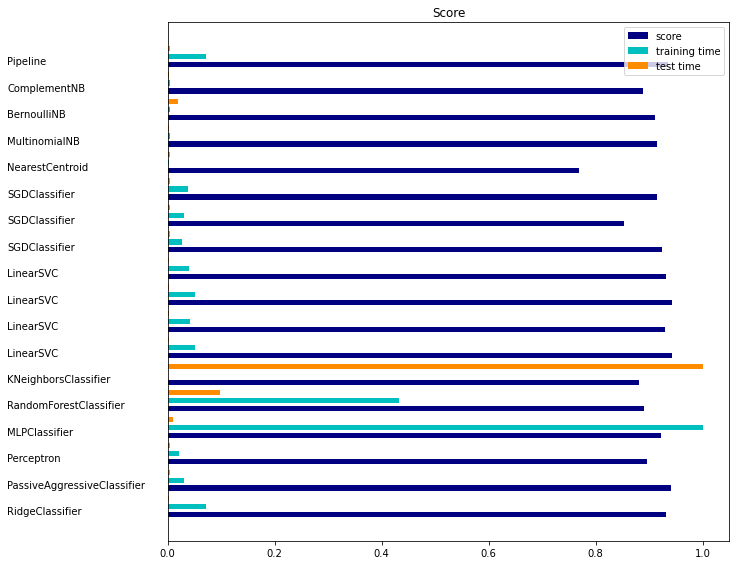

In [47]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()